In [3]:
!pip install rdkit
!pip install rdkit-pypi


  Using cached rdkit-2023.9.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
Using cached rdkit-2023.9.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 47.9 MB/s eta 0:00:00:00:0100:01


In [4]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd
import numpy as np


# Загрузка SMILES из файла
xlsx = pd.ExcelFile('/kaggle/input/flu-and-chemical-formuls/All-1614.xlsx')
df=xlsx.parse('Smile-IC50-CC50')
df=df.rename(columns={'Title':'molecule'})
print(df.isnull().sum())
admet_df=xlsx.parse('Structures-ADMET')
print(admet_df.isnull().sum())

full_df = pd.merge(df, admet_df, on=["molecule","SMILES","IC50, mmg/ml","CC50-MDCK, mmg/ml","SI","Pictures"], how='outer')
#smiles_column = full_df['SMILES']
full_df.drop(["Unnamed: 55","Unnamed: 56","Pictures"], axis= 1 , inplace= True)
full_df

molecule                     0
IC50, mmg/ml                 0
CC50-MDCK, mmg/ml            0
SI                           0
Molecular weight             0
Hydrogen bond acceptors      0
Hydrogen bond donors         0
Polar SA                     0
SMILES                       0
Pictures                   886
dtype: int64
molecule                         0
Pictures                       886
SMILES                           0
IC50, mmg/ml                     0
CC50-MDCK, mmg/ml                0
SI                              24
#stars                          67
#amine                          67
#amidine                        67
#acid                           67
#amide                          67
#rotor                          67
#rtvFG                          67
CNS                             67
mol_MW                          67
dipole                          67
SASA                            67
FOSA                            67
FISA                            67
PISA        

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.0,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.0,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.0,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.0,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0
1696,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.0,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0
1697,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,0.0,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0
1698,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.0,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0


In [5]:
full_df.isnull().sum()

molecule                        0
IC50, mmg/ml                    0
CC50-MDCK, mmg/ml               0
SI                             24
Molecular weight               35
Hydrogen bond acceptors        35
Hydrogen bond donors           35
Polar SA                       35
SMILES                          0
#stars                        102
#amine                        102
#amidine                      102
#acid                         102
#amide                        102
#rotor                        102
#rtvFG                        102
CNS                           102
mol_MW                        102
dipole                        102
SASA                          102
FOSA                          102
FISA                          102
PISA                          102
WPSA                          102
volume                        102
donorHB                       102
accptHB                       102
dip^2/V                       102
ACxDN^.5/SA                   102
glob          

In [6]:
df_cleaned =full_df.dropna(ignore_index=True)
df=df_cleaned
df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.0,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.0,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.0,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.0,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0
1565,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.0,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0
1566,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,0.0,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0
1567,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.0,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0


In [7]:
smiles_column = df['SMILES']

In [8]:
df.dtypes

molecule                       object
IC50, mmg/ml                  float64
CC50-MDCK, mmg/ml             float64
SI                            float64
Molecular weight              float64
Hydrogen bond acceptors       float64
Hydrogen bond donors          float64
Polar SA                      float64
SMILES                         object
#stars                        float64
#amine                        float64
#amidine                      float64
#acid                         float64
#amide                        float64
#rotor                        float64
#rtvFG                        float64
CNS                           float64
mol_MW                        float64
dipole                        float64
SASA                          float64
FOSA                          float64
FISA                          float64
PISA                          float64
WPSA                          float64
volume                        float64
donorHB                       float64
accptHB     

In [9]:
def calculate_similarity(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

Ищем похожие соединения для уже существующих веществ

In [10]:
target_smiles_Oseltamivir = "CCC(CC)OC1C=C(CC(C1NC(=O)C)N)C(=O)OCC"

In [11]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles, target_smiles_Oseltamivir)
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Oseltamivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Oseltamivir


,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
678,CHEMBL1200340,0.747,41.040,54.939759,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,27.810,98.675,6.0,0.0,6.0,0.0,6.0,4.0,22.0
679,CHEMBL1229,0.003,0.312,104.000000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
680,CHEMBL1229,0.005,78.103,15620.600000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
681,CHEMBL1229,0.010,40.017,4001.700000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
682,CHEMBL1229,0.016,31.241,1952.562500,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
683,CHEMBL1229,0.034,0.250,7.352941,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
684,CHEMBL1229,0.047,0.312,6.638298,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
685,CHEMBL1229,0.062,50.079,807.725806,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
686,CHEMBL1229,0.300,300.000,1000.000000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
687,CHEMBL1229,0.469,0.250,0.533049,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0


In [12]:
target_smiles_Zanamivir="CC(=O)NC1C(C=C(OC1C(C(CO)O)O)C(=O)O)N=C(N)N"


In [13]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles, target_smiles_Zanamivir)
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Zanamivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Zanamivir

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
31,1082-1008-Ya-187,6.100,201.700,33.065574,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
41,1381-Ya-266,0.700,62.000,88.571429,358.572,3.0,1.0,44.95,CC1(C)[C@H](CC2)CC(\[C@]12C)=N/CC(O)C\N=C(\[C@...,4.0,...,0.0,0.000,47.284,3.0,1.0,0.0,0.0,0.0,0.0,26.0
119,1563-Ya-371-13,8.400,111.000,13.214286,320.566,1.0,0.0,15.60,CCCCN(CCCC)CCC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.0,0.000,17.981,2.0,1.0,0.0,0.0,0.0,0.0,23.0
122,1569-Ya-372-10,12.900,300.000,23.255814,233.400,1.0,0.0,12.36,C[C@@]12C(C)(C)[C@H](CC2)CC\1=N/C3CCCCC3,5.0,...,0.0,0.000,10.985,1.0,0.0,6.0,0.0,6.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,CHEMBL4289794,46.204,168.014,3.636352,840.079,12.0,7.0,225.59,OC[C@@H](O)[C@@H](O)[C@H](O1)[C@H](NC(=O)C)[C@...,13.0,...,0.0,45.958,230.726,15.0,3.0,33.0,0.0,33.0,23.0,60.0
1147,CHEMBL4294084,30.739,151.798,4.938287,759.002,10.0,7.0,194.88,OC[C@@H](O)[C@@H](O)[C@H](O1)[C@H](NC(=O)C)[C@...,4.0,...,0.0,27.656,190.393,12.0,3.0,28.0,0.0,28.0,23.0,54.0
1148,CHEMBL4294489,16.687,118.112,7.078085,869.115,12.0,3.0,192.86,CC(=O)OC[C@@H](OC(=O)C)[C@@H](OC(=O)C)[C@H](O1...,11.0,...,0.0,39.379,215.088,14.0,2.0,28.0,0.0,28.0,23.0,62.0
1294,CHEMBL4761569,10.000,14.900,1.490000,758.325,1.0,1.0,12.47,CCCCCCCCCCCC[N+]12CC[N+](CC1)(CC2)CCN(CCCCCOCC...,16.0,...,0.0,0.000,9.450,6.0,2.0,16.0,0.0,16.0,16.0,54.0


In [14]:
target_smiles_Baloxavir_Marboxil="COC(=O)OCOC1=C2C(=O)N3CCOCC3N(N2C=CC1=O)C4C5=C(CSC6=CC=CC=C46)C(=C(C=C5)F)F"

In [15]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Baloxavir_Marboxil )
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Baloxavir_Marboxil = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Baloxavir_Marboxil

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
12,1035-DS-80-1,11.000000,9.400000,0.854545,520.590,6.0,2.0,93.81,c1ccccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]34C)O...,1.0,...,0.000,0.0,80.553,7.0,2.0,32.0,0.0,32.0,4.0,39.0
13,1036-DS-80-2,33.000000,30.000000,0.909091,520.590,6.0,2.0,93.81,c1ccccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@@]34C)...,2.0,...,0.000,0.0,79.388,7.0,2.0,31.0,0.0,28.0,2.0,39.0
14,1037-DS-86-1,33.000000,43.900000,1.330303,555.035,6.0,2.0,93.81,c1cc(Cl)ccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]3...,2.0,...,0.000,0.0,80.553,7.0,2.0,32.0,0.0,32.0,4.0,40.0
15,1038-DS-86-2,33.000000,44.900000,1.360606,555.035,6.0,2.0,93.81,c1cc(Cl)ccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@@]...,4.0,...,0.000,0.0,79.388,7.0,2.0,31.0,0.0,28.0,2.0,40.0
16,1039-DS-101-1,9.500000,330.000000,34.736842,550.617,7.0,2.0,103.04,c1cccc(OC)c1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]3...,1.0,...,0.000,0.0,79.070,8.0,2.0,32.0,0.0,32.0,4.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,M-1-5fd-S,4.903402,10.507290,2.142857,700.486,3.0,0.0,43.37,FC(F)(F)c1cc(ccc1)\C=C\C(=O)c(c(F)c(F)c2F)c(c2...,5.0,...,433.791,0.0,54.355,3.0,1.0,28.0,0.0,28.0,1.0,49.0
1557,M-1-7a-E,0.372695,0.798633,2.142857,532.422,3.0,1.0,68.27,FC(F)(F)c1ccc(cc1)[C@H]2C(C#N)=C(N)OC3=C2[C@@H...,3.0,...,281.346,0.0,65.170,4.0,1.0,26.0,0.0,26.0,2.0,38.0
1558,M-1-7a-Z,0.372695,0.798633,2.142857,532.422,3.0,1.0,68.27,FC(F)(F)c1ccc(cc1)[C@@H]2C(C#N)=C(N)OC3=C2[C@@...,2.0,...,198.907,0.0,63.987,4.0,1.0,26.0,0.0,26.0,2.0,38.0
1559,M-1-7b-E,0.385288,0.715536,1.857143,550.412,3.0,1.0,68.27,FC(F)(F)c1ccc(cc1)[C@H]2C(C#N)=C(N)OC3=C2[C@@H...,4.0,...,323.288,0.0,65.167,4.0,1.0,26.0,0.0,26.0,2.0,39.0


In [16]:
target_smiles_Peramivir="CCC(CC)C(C1C(CC(C1O)C(=O)O)N=C(N)N)NC(=O)C"

In [17]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Peramivir )
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Peramivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Peramivir

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
50,1390-Ya-270,8.100,277.000,34.197531,195.307,1.0,1.0,29.10,CC(=O)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,35.881,32.746,2.0,0.0,7.0,0.0,7.0,7.0,14.0
236,2360-Ya-504,42.700,300.000,7.025761,195.307,1.0,1.0,29.10,CC(=O)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,35.881,32.746,2.0,0.0,7.0,0.0,7.0,7.0,14.0
239,2364-Ya-503,100.000,300.000,3.000000,211.372,0.0,1.0,44.12,CC(=S)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,0.000,13.247,1.0,0.0,7.0,0.0,7.0,7.0,14.0
289,2604-Ya-523,5.000,300.000,60.000000,263.427,1.0,1.0,29.10,CC(=O)N[C@@H]1[C@](C)(CCC2)[C@@H]([C@H]3[C@@]1...,2.0,...,0.0,44.887,34.764,2.0,0.0,16.0,8.0,8.0,12.0,19.0
315,2740-Ya-543,14.000,300.000,21.428571,182.221,3.0,0.0,43.37,C[C@@]12C(C)(C)[C@@H](CC1)C(=O)OC2=O,2.0,...,0.0,0.000,62.123,3.0,0.0,8.0,0.0,8.0,5.0,13.0
698,CHEMBL139367,1.727,32.841,19.016213,328.415,3.0,3.0,148.53,CC(=O)N[C@@H](C(CC)CC)[C@@H]([C@@H](C1)NC(=N)N...,0.0,...,0.0,25.475,164.413,8.0,1.0,5.0,0.0,5.0,5.0,23.0
699,CHEMBL139367,1.727,65.682,38.032426,328.415,3.0,3.0,148.53,CC(=O)N[C@@H](C(CC)CC)[C@@H]([C@@H](C1)NC(=N)N...,0.0,...,0.0,25.475,164.413,8.0,1.0,5.0,0.0,5.0,5.0,23.0
778,CHEMBL2203571,0.249,20.736,83.277108,207.362,0.0,0.0,26.02,CCC(CC)([C@@]12N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.096,1.0,0.0,10.0,0.0,10.0,10.0,15.0
779,CHEMBL2203571,0.353,14.100,39.943343,207.362,0.0,0.0,26.02,CCC(CC)([C@@]12N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.096,1.0,0.0,10.0,0.0,10.0,10.0,15.0
780,CHEMBL2203571,0.975,20.736,21.267692,207.362,0.0,0.0,26.02,CCC(CC)([C@@]12N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.096,1.0,0.0,10.0,0.0,10.0,10.0,15.0


In [18]:
target_smiles_Amantadine="C1C2CC3CC1CC(C2)(C3)N"

In [19]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Amantadine )
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Amantadine = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Amantadine

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
90,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
91,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
642,858-AmAd,9.700,42.900,4.422680,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,5.0,...,0.0,0.0,24.618,1.0,0.0,10.0,0.0,10.0,10.0,11.0
643,859-AmAd,45.900,37.000,0.806100,151.254,0.0,0.0,26.02,[C@H]12[C@H](N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.0,22.154,1.0,0.0,10.0,0.0,10.0,10.0,11.0
761,CHEMBL2203567,1.581,26.347,16.664769,263.470,0.0,0.0,3.24,CCCC(CCC)([C@@]12N(C)C)[C@H]3C[C@@H](C2)C[C@@H...,6.0,...,0.0,0.0,1.571,1.0,0.0,10.0,0.0,10.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,CHEMBL959,11.476,65.000,5.663994,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1485,CHEMBL959,12.014,60.069,4.999917,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1486,CHEMBL959,12.014,60.105,5.002913,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1487,CHEMBL959,12.372,58.455,4.724782,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0


In [20]:
target_smiles_Rimantadine="CC(C12CC3CC(C1)CC(C3)C2)N"

In [21]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Rimantadine)
    
    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Rimantadine = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Rimantadine

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
19,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.0,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
20,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.0,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
37,1377-AS-131-14,2.000,65.900,32.950000,211.350,1.0,1.0,32.26,OCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.0,34.056,2.0,0.0,7.0,0.0,7.0,7.0,15.0
40,1380-AS-136,3.400,72.900,21.441176,239.404,1.0,1.0,32.26,OCCCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.0,34.055,2.0,0.0,7.0,0.0,7.0,7.0,17.0
90,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,CHEMBL959,11.476,65.000,5.663994,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1485,CHEMBL959,12.014,60.069,4.999917,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1486,CHEMBL959,12.014,60.105,5.002913,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1487,CHEMBL959,12.372,58.455,4.724782,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0


Объедим уже полученные данные

In [74]:
merged_df = pd.concat([selected_rows_Oseltamivir,selected_rows_Zanamivir,selected_rows_Baloxavir_Marboxil,selected_rows_Amantadine,selected_rows_Rimantadine]).drop_duplicates()
merged_df=merged_df.rename(columns={'Title':'molecule'})
merged_df=merged_df.reset_index(drop=True)
for_class=merged_df
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,CHEMBL1200340,0.747,41.040,54.939759,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,27.810,98.675,6.0,0.0,6.0,0.0,6.0,4.0,22.0
1,CHEMBL1229,0.003,0.312,104.000000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
2,CHEMBL1229,0.005,78.103,15620.600000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
3,CHEMBL1229,0.010,40.017,4001.700000,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
4,CHEMBL1229,0.016,31.241,1952.562500,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.000,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
419,1377-AS-131-14,2.000,65.900,32.950000,211.350,1.0,1.0,32.26,OCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.000,34.056,2.0,0.0,7.0,0.0,7.0,7.0,15.0
420,1380-AS-136,3.400,72.900,21.441176,239.404,1.0,1.0,32.26,OCCCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.000,34.055,2.0,0.0,7.0,0.0,7.0,7.0,17.0
421,840-Ya-106,0.300,2.100,7.000000,388.686,0.0,0.0,24.06,C[C@]12C(C)(C)[C@@H](CC2)C[C@@H]1NCCCCCCN[C@@H...,6.0,...,0.0,0.000,14.878,2.0,1.0,0.0,0.0,0.0,0.0,28.0


Был проанализирован датасет и теперь будем готовить датасет для обученя

In [75]:
merged_df['Recommendation'] = np.where(merged_df['SI']>10, 0, 1)
merged_df = merged_df.sample(frac=1)
merged_df=merged_df.reset_index(drop=True)
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,6279-IOS-LFC-ESh-752,85.500,158.0000,1.847953,418.107,1.0,0.0,26.93,FC(F)(F)C(F)(F)c1c(I)c(=O)n(n1C)-c2ccccc2,2.0,...,0.0,35.330,3.0,0.0,11.0,0.0,11.0,0.0,21.0,1
1,CHEMBL2335587,103.607,161.1800,1.555686,322.364,4.0,0.0,52.60,CC(C)c(cc1)cc(O2)c1C(=O)[C@@]23c4c(C(=O)O3)cc(...,0.0,...,0.0,73.886,4.0,0.0,17.0,0.0,17.0,1.0,24.0,1
2,2434-j764H,2.000,26.2000,13.100000,255.407,0.0,0.0,12.03,C=C(C)[C@@H](CC1)CC=C1CNCCc2ccccc2,1.0,...,0.0,12.627,1.0,0.0,12.0,0.0,12.0,4.0,19.0,0
3,M-1-5ea-R,3.828,4.3065,1.125000,478.500,3.0,0.0,43.37,c1ccccc1\C=C\C(=O)c(c(F)c(F)c2)c(c23)O[C@H](c4...,3.0,...,0.0,55.918,3.0,1.0,28.0,0.0,28.0,1.0,36.0,1
4,858-AmAd,9.700,42.9000,4.422680,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,5.0,...,0.0,24.618,1.0,0.0,10.0,0.0,10.0,10.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,CHEMBL4859942,1.610,47.3570,29.414286,473.574,7.0,3.0,115.07,CCCCCCCCCCOc(c1)ccc(c12)Oc3c(N2)nc(=O)n(c3)[C@...,0.0,...,0.0,119.010,9.0,0.0,19.0,0.0,19.0,4.0,34.0,0
419,5880-LFC-ESh-698,33.000,95.7000,2.900000,364.392,1.0,0.0,52.23,CSc(cc1)ccc1-c(c2C(F)(F)F)c(=O)n(n2C)-c3ccccc3,1.0,...,0.0,32.249,3.0,0.0,17.0,0.0,17.0,0.0,25.0,1
420,CHEMBL4450348,0.009,0.7540,83.777778,432.861,2.0,2.0,90.90,C1C[C@H](CC2)[C@@H]([C@H]([C@@H]12)C(=O)O)Nc(c...,1.0,...,0.0,90.741,6.0,1.0,23.0,0.0,23.0,8.0,30.0,0
421,CHEMBL2203570,1.793,17.9310,10.000558,179.308,0.0,0.0,26.02,N[C@]12C(C)(C)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,21.641,1.0,0.0,10.0,0.0,10.0,10.0,13.0,0


In [76]:
merged_df = pd.concat([merged_df, merged_df[merged_df['Recommendation'] == 0]])

In [77]:
merged_df = merged_df.sample(frac=1)
merged_df=merged_df.reset_index(drop=True)
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,3859_KS-O-687,27.700000,300.000000,10.830325,671.778,7.0,0.0,112.52,c1ccccc1-c(cc2)ccc2-c(n3)cn(c34)c(cs4)COc5c(C)...,4.0,...,0.000,91.554,9.0,2.0,42.0,0.0,42.0,5.0,49.0,0
1,CHEMBL1229,2.593000,93.723000,36.144620,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0,0
2,6694-IOS-ENA-373,7.900000,32.400000,4.101266,332.287,3.0,2.0,65.85,FC(F)(F)C1=NNC(=O)C\1=N/Nc(cc2)ccc2-c3ccccc3,1.0,...,0.000,78.923,5.0,0.0,17.0,0.0,17.0,0.0,24.0,1
3,CHEMBL660,0.771000,10.588000,13.732815,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,6.0,...,0.000,24.357,1.0,0.0,10.0,0.0,10.0,10.0,11.0,0
4,3856_KS-O-679,4.400000,300.000000,68.181818,663.678,7.0,0.0,112.52,FC(F)(F)c1cc(ccc1)-c(n2)cn(c23)c(cs3)COc4c(C)c...,2.0,...,0.000,91.443,9.0,2.0,36.0,0.0,36.0,5.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,CHEMBL1076899,1.994000,79.770000,40.005015,664.757,11.0,4.0,161.21,CCCCCCCCCCCC(=O)OC[C@H]([C@@H](O1)c(c2)ccc(O)c...,6.0,...,0.000,171.807,11.0,3.0,26.0,0.0,26.0,4.0,48.0,0
563,M-1-7a-Z,0.372695,0.798633,2.142857,532.422,3.0,1.0,68.27,FC(F)(F)c1ccc(cc1)[C@@H]2C(C#N)=C(N)OC3=C2[C@@...,2.0,...,0.000,63.987,4.0,1.0,26.0,0.0,26.0,2.0,38.0,1
564,1008-Ya-187,9.900000,144.000000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0
565,CHEMBL446574,100.000000,46.900000,0.469000,580.504,15.0,9.0,249.20,O[C@@H]1CO[C@H]([C@H](O)[C@H]1O)O[C@H]([C@@H](...,7.0,...,0.000,241.720,15.0,3.0,28.0,0.0,28.0,10.0,41.0,1


**Делим на классы**
* 1- подходит и похож на использующиеся препарат
* 2- похожий на использующий препорат,но не подходит
* 3- подходит,но не похож на использующиеся препарат
* 4- не похожий на использующий препорат и не подходит


In [26]:
print(df.columns.tolist ())

['molecule', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']


In [78]:
df_for_train = pd.merge(df, merged_df, on=df.columns.tolist (), how='outer')
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0,NaN
1726,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0,NaN
1727,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0,NaN
1728,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0,NaN


In [79]:
condition = df_for_train['SI']>10
df_for_train.loc[df_for_train['Recommendation'].isnull() & condition, 'Recommendation'] = 2
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0,NaN
1726,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0,NaN
1727,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0,2.0
1728,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0,2.0


In [80]:
condition = df_for_train['SI']<=10
df_for_train.loc[df_for_train['Recommendation'].isnull() & condition, 'Recommendation'] = 3
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0,3.0
1726,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0,3.0
1727,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0,2.0
1728,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0,2.0


In [81]:
df_for_train.isna().sum()

molecule                      0
IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC1

In [82]:
df_for_train=merged_df
df_for_train.drop(["molecule"], axis= 1 , inplace= True)
df_for_train.isna().sum()

IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoc

In [83]:
print(df_for_train.columns.tolist())

['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm', 'Recommendation']


**Обучение с помощью библиотеки DeepChem**

In [33]:
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:0000:01


In [84]:
import deepchem as dc

featurizer = dc.feat.ConvMolFeaturizer()
features = featurizer.featurize(df_for_train['SMILES'])


In [85]:
from deepchem.feat import RDKitDescriptors
rdkit_featurizer = RDKitDescriptors()
rdkit_features = rdkit_featurizer.featurize(df_for_train['SMILES'])
rdkit_features

array([[ 2.4559622 , -2.38086445,  2.54522032, ...,  0.        ,
         0.        ,  0.15917392],
       [ 2.35321702, -2.36186317,  2.2354472 , ...,  0.        ,
         0.        ,  0.69122352],
       [ 2.44929273, -2.06472126,  2.2225862 , ...,  0.        ,
         0.        ,  0.84805882],
       ...,
       [ 2.59073276, -2.34360478,  2.63437239, ...,  0.        ,
         0.        ,  0.72748676],
       [ 2.49960777, -2.44040004,  2.37798293, ...,  0.        ,
         0.        ,  0.1562889 ],
       [ 2.35321702, -2.36186317,  2.2354472 , ...,  0.        ,
         0.        ,  0.69122352]])

In [86]:
da=pd.DataFrame(rdkit_features)
da

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.455962,-2.380864,2.545220,-2.359437,7.148243,0.008709,32.133461,9.849324,1.009324,2243.468910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.159174
1,2.353217,-2.361863,2.235447,-2.566453,5.886966,-0.138719,16.533299,9.878815,2.981510,418.368869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691224
2,2.449293,-2.064721,2.222586,-2.328693,6.695208,-0.113859,19.413249,10.060216,1.770768,811.466209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.848059
3,2.481276,-2.547053,2.539193,-2.552993,5.038957,0.000365,14.788664,9.531931,1.940004,150.027586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562066
4,2.456653,-2.380864,2.545392,-2.359437,7.148236,-0.137110,32.133461,9.849324,1.114770,2072.329669,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.177373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2.406108,-2.351204,2.456969,-2.380645,6.052276,-0.148294,16.605001,9.921976,1.280432,1585.717988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.099499
563,2.430892,-2.376566,2.531115,-2.286652,5.766583,-0.137973,19.417074,9.766168,1.727278,1513.446507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354235
564,2.590733,-2.343605,2.634372,-2.329689,5.938499,0.193419,15.116207,9.700599,1.991809,327.988662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727487
565,2.499608,-2.440400,2.377983,-2.635293,5.878426,-0.344554,16.752191,9.981370,1.598337,1439.554181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156289


In [87]:
data=df_for_train
new_df=pd.concat([data,da],axis=1)
new_df.dropna(inplace=True,ignore_index=True)
data=new_df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']]
data

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,#stars,#amine,#amidine,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,27.700000,300.000000,10.830325,671.778,7.0,0.0,112.52,4.0,1.0,0.0,...,0.000,0.000,91.554,9.0,2.0,42.0,0.0,42.0,5.0,49.0
1,2.593000,93.723000,36.144620,312.413,4.0,1.0,90.65,0.0,1.0,0.0,...,0.000,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
2,7.900000,32.400000,4.101266,332.287,3.0,2.0,65.85,1.0,0.0,0.0,...,114.814,0.000,78.923,5.0,0.0,17.0,0.0,17.0,0.0,24.0
3,0.771000,10.588000,13.732815,151.254,0.0,0.0,26.02,6.0,1.0,0.0,...,0.000,0.000,24.357,1.0,0.0,10.0,0.0,10.0,10.0,11.0
4,4.400000,300.000000,68.181818,663.678,7.0,0.0,112.52,2.0,1.0,0.0,...,117.511,0.000,91.443,9.0,2.0,36.0,0.0,36.0,5.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1.994000,79.770000,40.005015,664.757,11.0,4.0,161.21,6.0,0.0,0.0,...,0.000,0.000,171.807,11.0,3.0,26.0,0.0,26.0,4.0,48.0
563,0.372695,0.798633,2.142857,532.422,3.0,1.0,68.27,2.0,0.0,0.0,...,198.907,0.000,63.987,4.0,1.0,26.0,0.0,26.0,2.0,38.0
564,9.900000,144.000000,14.545455,250.431,1.0,0.0,15.60,2.0,1.0,0.0,...,0.000,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
565,100.000000,46.900000,0.469000,580.504,15.0,9.0,249.20,7.0,0.0,0.0,...,0.000,0.000,241.720,15.0,3.0,28.0,0.0,28.0,10.0,41.0


In [88]:
data.isna().sum().sum()

0

In [89]:
new_df['Recommendation'].value_counts()

Recommendation
0    288
1    279
Name: count, dtype: int64

In [125]:
dataset = dc.data.NumpyDataset(X=data.values, y=new_df['Recommendation'])  

# 3. Разделение данных
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset)

In [126]:
model = dc.models.MultitaskClassifier(
    n_tasks=1,  # Одна задача - бинарная классификация
    n_features=data.shape[1],
    layer_sizes=[100, 50],
    dropouts=[0.2, 0.2],
    mode='classification'
)

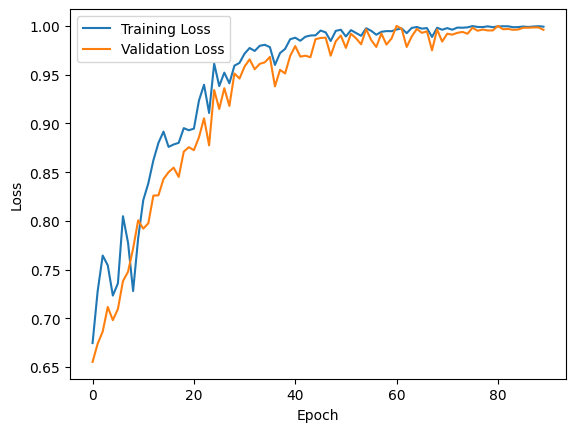

In [127]:
import deepchem as dc
import pandas as pd
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# Обучение модели с отслеживанием истории
losses = []
val_losses = []

for epoch in range(90):  # 100 эпох обучения
    model.fit(train_dataset, nb_epoch=1)  # Обучение модели на одной эпохе

    # Оценка на обучающей и валидационной выборках
    train_scores = model.evaluate(train_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])
    val_scores = model.evaluate(test_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])

    # Запись потерь
    losses.append(train_scores['roc_auc_score'])
    val_losses.append(val_scores['roc_auc_score'])

# Построение графиков обучения
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
pip install --upgrade scikit-learn


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.1 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


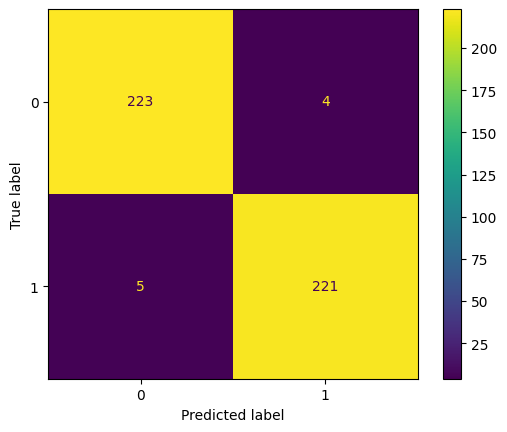

In [132]:
from sklearn import metrics
import matplotlib.pyplot as plt
dataset_pred = dc.data.NumpyDataset(X=train_dataset.X)  
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,train_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
#classes = np.argmax(prediction, axis=2)


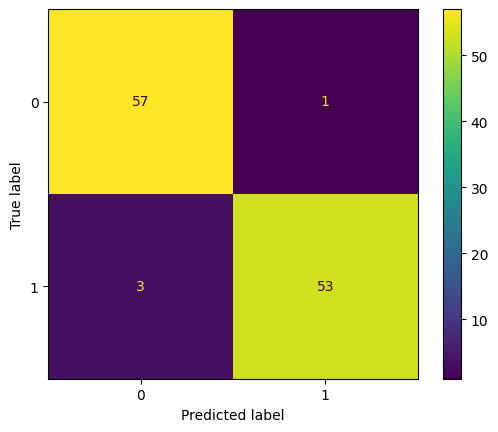

In [133]:
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)  
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,test_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [140]:
import matplotlib.pyplot as plt
#6. Оценка модели
# Определение метрики
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# Оценка на обучающей выборке
train_scores = model.evaluate(train_dataset, [metric], transformers=[])

# Оценка на тестовой выборке
test_scores = model.evaluate(test_dataset, [metric], transformers=[])

print(f'Train ROC AUC: {train_scores["roc_auc_score"]}')
print(f'Test ROC AUC: {test_scores["roc_auc_score"]}')

metric = dc.metrics.Metric(dc.metrics.recall_score)
test_scores = model.evaluate(test_dataset, [metric], transformers=[])
print(f'Test RECALL: {test_scores["recall_score"]}')

Train ROC AUC: 0.9992397660818713
Test ROC AUC: 0.9959876543209876
Test RECALL: 0.9814814814814815


TypeError: Model.evaluate() got an unexpected keyword argument 'average'

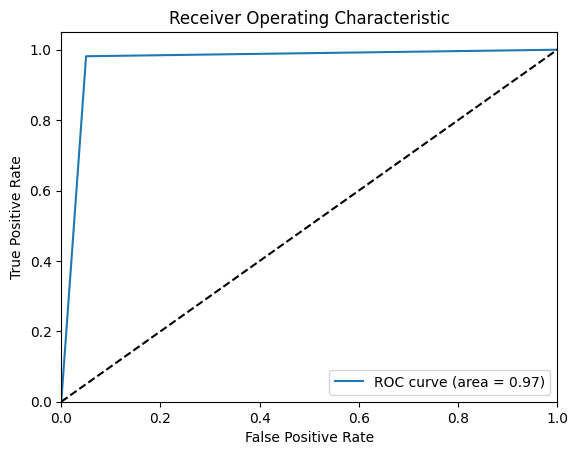

In [135]:
import deepchem as dc
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Оценка на тестовой выборке
y_true = test_dataset.y
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)  
y_pred = model.predict(dataset_pred) # Получаем вероятности для класса "1"
y_pred = np.argmax(y_pred, axis=2)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
for_class['Recommendation'] = 1
for_class = for_class.sample(frac=1)
for_class=for_class.reset_index(drop=True)
for_class

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,6901_ZV-068,52.600,300.000,5.703422,414.530,3.0,0.0,70.67,c1ccccc1C(=O)c2c(-c(cc3)ccc3C)nc(s2)N(C4)C[C@H...,1.0,...,0.0,49.365,4.0,1.0,27.0,0.0,27.0,6.0,30.0,1
1,3850_KS-O-641(1),18.000,200.000,11.111111,625.706,8.0,0.0,121.75,COc(cc1)ccc1-c(n2)cn(c23)c(cs3)COc4c(C)ccc(c45...,1.0,...,0.0,100.027,10.0,1.0,36.0,0.0,36.0,5.0,45.0,1
2,CHEMBL2335585,27.048,135.105,4.995009,270.219,4.0,0.0,52.60,c1cccc(C(=O)O2)c1[C@]23C(=O)c4c(O3)cc(F)cc4,1.0,...,0.0,78.326,4.0,0.0,17.0,0.0,17.0,1.0,20.0,1
3,CHEMBL4782889,3.463,213.784,61.733757,534.462,3.0,1.0,58.64,FC(F)(F)c1ccc(cc1)NC(=C2C(=O)OCC)C(=O)N(c(cc3)...,3.0,...,0.0,66.922,5.0,2.0,23.0,0.0,23.0,1.0,38.0,1
4,877-DS-204-1,2.700,36.000,13.333333,509.319,7.0,2.0,110.13,CC(=O)C(C1=O)=C(O)C=C2Oc(c3[C@]12C)c4c(c(C)c3O...,1.0,...,0.0,129.909,7.0,1.0,18.0,0.0,18.0,1.0,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,CHEMBL4216808,38.873,103.385,2.659558,413.543,3.0,2.0,101.12,C1CN(C)CCN1C(=O)c2c(sc(c23)CCCCC3)NC(=O)c4c(O)...,0.0,...,0.0,85.172,6.0,0.0,22.0,0.0,17.0,9.0,29.0,1
419,3851_KS-O-641(2),50.000,176.800,3.536000,641.705,9.0,0.0,130.98,c1ccc(OC)cc1-c(n2)cn(c23)c(cs3)COc4c(OC)ccc(c4...,2.0,...,0.0,104.703,11.0,2.0,36.0,0.0,36.0,5.0,46.0,1
420,CHEMBL4514659,165.000,188.000,1.139394,440.905,3.0,0.0,71.84,c1cc(F)cc(F)c1-c2cn(nn2)CC(=C3Cl)CCc(c34)nc(cc...,1.0,...,0.0,42.131,4.0,1.0,26.0,0.0,26.0,2.0,30.0,1
421,6639_ZV-092,38.400,300.000,7.812500,555.549,4.0,0.0,147.36,c1ccccc1N(C2=O)C[C@@H]([C@@H]23)[C@H](c4c([C@@...,0.0,...,0.0,167.024,11.0,2.0,30.0,0.0,30.0,7.0,41.0,1


In [49]:
df_for_train = pd.merge(df, for_class, on=df.columns.tolist (), how='outer')
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
1,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,SVD-V-3,300.0,300.0,1.000000,306.433,0.0,1.0,51.12,c1ccccc1CN2[C@H](CCC2=S)c3c[nH]c(c34)cccc4,0.0,...,0.000,20.426,2.0,0.0,23.0,7.0,16.0,9.0,22.0,NaN
1565,SVD-V-4,3.7,34.4,9.297297,333.393,0.0,1.0,62.17,c1ccccc1CN2[C@H](CC/C2=C\[N+]([O-])=O)c3c[nH]c...,2.0,...,0.000,56.713,5.0,0.0,23.0,7.0,16.0,9.0,25.0,NaN
1566,SVD-V-5,5.4,300.0,55.555556,290.368,1.0,1.0,36.10,c1ccccc1CN2[C@H](CCC2=O)c3c[nH]c(c34)cccc4,1.0,...,42.345,41.466,3.0,0.0,23.0,7.0,16.0,9.0,22.0,NaN
1567,Ya-573,4.8,300.0,62.500000,275.369,3.0,0.0,84.34,O=S(=O)(O)OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,1.0,...,0.000,89.447,5.0,0.0,7.0,0.0,7.0,6.0,18.0,NaN


In [50]:
df_for_train.loc[df_for_train['Recommendation'].isnull(), 'Recommendation'] = 0
df_for_train = pd.concat([df_for_train, df_for_train[df_for_train['Recommendation'] == 1]])


In [51]:
df_for_train = df_for_train.sample(frac=1)
df_for_train=df_for_train.reset_index(drop=True)
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,4233_PTC-04,3.000,19.700,6.566667,515.577,8.0,2.0,125.30,c1ccc(O)cc1C(=O)/C=C\c2ccc(cc2)/C=N/Nc3nc(N4CC...,1.0,...,0.000,127.338,11.0,2.0,30.0,0.0,30.0,8.0,38.0,1.0
1,1863-Od2-8-7,300.000,330.000,1.100000,296.326,4.0,0.0,48.67,c1ccc(OC)cc1COc(cc2)cc(c23)oc(=O)cc3C,0.0,...,0.000,55.958,4.0,0.0,16.0,0.0,16.0,0.0,22.0,1.0
2,3873_KS-N-679,9.000,300.000,33.333333,679.677,8.0,0.0,121.75,FC(F)(F)c1cc(ccc1)-c(n2)cn(c23)c(cs3)CN(CC4)[C...,2.0,...,0.000,94.985,10.0,2.0,36.0,0.0,36.0,5.0,48.0,1.0
3,1875-AS-243,0.300,58.300,194.333333,249.443,1.0,0.0,12.36,CCCCCCC/N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,3.0,...,0.000,15.499,1.0,1.0,7.0,0.0,7.0,6.0,18.0,0.0
4,CHEMBL4287269,7.214,163.480,22.661492,869.115,12.0,3.0,192.86,CC(=O)OC[C@@H](OC(=O)C)[C@@H](OC(=O)C)[C@H](O1...,10.0,...,38.456,219.277,14.0,3.0,28.0,0.0,28.0,23.0,62.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,876-DS-202-1,2.200,15.200,6.909091,460.444,8.0,2.0,119.36,CC(=O)C(C1=O)=C(O)C=C2Oc(c3[C@]12C)c4c(c(C)c3O...,1.0,...,0.000,137.546,8.0,0.0,18.0,0.0,18.0,1.0,34.0,1.0
2047,CHEMBL474596,500.000,322.500,0.645000,758.647,21.0,13.0,348.58,O[C@@H]1CO[C@H]([C@H](O)[C@H]1O)O[C@H]([C@@H](...,13.0,...,0.000,337.710,21.0,3.0,34.0,0.0,34.0,15.0,53.0,1.0
2048,CHEMBL2335946,1.990,103.760,52.140704,280.283,4.0,0.0,52.60,c1cc(C)c(C)c(O2)c1C(=O)[C@@]23c4c(C(=O)O3)cccc4,0.0,...,0.000,79.165,4.0,0.0,17.0,0.0,17.0,1.0,21.0,1.0
2049,CHEMBL4437923,19.017,41.837,2.199979,380.345,2.0,2.0,58.20,c1c(F)ccc(F)c1CNC(=O)C(=C)CC(=O)NCc2c(F)ccc(F)c2,0.0,...,27.120,72.397,4.0,0.0,12.0,0.0,12.0,0.0,27.0,0.0


In [52]:
df_for_train.drop(["molecule"], axis= 1 , inplace= True)
df_for_train.isna().sum()

IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoc

In [53]:
import deepchem as dc

featurizer = dc.feat.ConvMolFeaturizer()
features = featurizer.featurize(df_for_train['SMILES'])

In [54]:
from deepchem.feat import RDKitDescriptors
rdkit_featurizer = RDKitDescriptors()
rdkit_features = rdkit_featurizer.featurize(df_for_train['SMILES'])
rdkit_features

array([[ 2.20184498, -2.29640996,  2.18760368, ...,  0.        ,
         0.        ,  0.20011169],
       [ 2.04478116, -2.08431907,  2.22979692, ...,  0.        ,
         0.        ,  0.68893031],
       [ 2.46988685, -2.40189706,  2.55612515, ...,  0.        ,
         0.        ,  0.1714372 ],
       ...,
       [ 2.58727185, -2.20753418,  2.48146314, ...,  0.        ,
         0.        ,  0.69621272],
       [ 2.13469096, -2.09673001,  2.10837618, ...,  0.        ,
         0.        ,  0.57288908],
       [ 2.58364501, -2.66674845,  2.48275569, ...,  0.        ,
         0.        ,  0.72623195]])

In [55]:
da=pd.DataFrame(rdkit_features)
da

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.201845,-2.296410,2.187604,-2.396486,6.065740,0.104246,16.480338,10.081485,1.242665,1264.783191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200112
1,2.044781,-2.084319,2.229797,-1.989713,5.807085,0.304833,16.479299,10.128011,1.830400,864.335309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.688930
2,2.469887,-2.401897,2.556125,-2.385948,7.148248,-0.137111,32.133461,9.846114,1.229229,2092.487665,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.171437
3,2.590570,-2.342609,2.634586,-2.321823,5.938371,0.193514,14.810722,9.700535,1.839641,315.571782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.570501
4,2.690727,-2.709457,2.754327,-2.673412,5.880258,-0.203478,16.628431,9.332421,1.405220,1888.767549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.563844,-2.274616,2.590634,-2.384187,6.260601,-0.123262,16.509960,9.705931,1.703660,1439.181264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523805
2047,2.504573,-2.440442,2.408516,-2.635294,5.880295,-0.344555,16.754352,9.981214,1.428754,1816.087357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097593
2048,2.587272,-2.207534,2.481463,-2.367154,6.118582,-0.098067,16.731471,9.954146,1.963654,821.534975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.696213
2049,2.134691,-2.096730,2.108376,-2.290108,5.975187,-0.122955,19.146744,10.131384,1.825411,884.008527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572889


In [56]:
data=df_for_train
new_df=pd.concat([data,da],axis=1)
new_df.dropna(inplace=True,ignore_index=True)
data=new_df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']]
data

,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,#stars,#amine,#amidine,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,3.000,19.700,6.566667,515.577,8.0,2.0,125.30,1.0,0.0,0.0,...,0.000,0.000,127.338,11.0,2.0,30.0,0.0,30.0,8.0,38.0
1,300.000,330.000,1.100000,296.326,4.0,0.0,48.67,0.0,0.0,0.0,...,0.000,0.000,55.958,4.0,0.0,16.0,0.0,16.0,0.0,22.0
2,9.000,300.000,33.333333,679.677,8.0,0.0,121.75,2.0,1.0,0.0,...,117.511,0.000,94.985,10.0,2.0,36.0,0.0,36.0,5.0,48.0
3,0.300,58.300,194.333333,249.443,1.0,0.0,12.36,3.0,0.0,0.0,...,0.000,0.000,15.499,1.0,1.0,7.0,0.0,7.0,6.0,18.0
4,7.214,163.480,22.661492,869.115,12.0,3.0,192.86,10.0,0.0,0.0,...,0.000,38.456,219.277,14.0,3.0,28.0,0.0,28.0,23.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,2.200,15.200,6.909091,460.444,8.0,2.0,119.36,1.0,0.0,0.0,...,0.000,0.000,137.546,8.0,0.0,18.0,0.0,18.0,1.0,34.0
2046,500.000,322.500,0.645000,758.647,21.0,13.0,348.58,13.0,0.0,0.0,...,0.000,0.000,337.710,21.0,3.0,34.0,0.0,34.0,15.0,53.0
2047,1.990,103.760,52.140704,280.283,4.0,0.0,52.60,0.0,0.0,0.0,...,0.000,0.000,79.165,4.0,0.0,17.0,0.0,17.0,1.0,21.0
2048,19.017,41.837,2.199979,380.345,2.0,2.0,58.20,0.0,0.0,0.0,...,145.545,27.120,72.397,4.0,0.0,12.0,0.0,12.0,0.0,27.0


In [57]:
data.isna().sum().sum()


0

In [58]:
new_df['Recommendation'].value_counts()

Recommendation
0.0    1086
1.0     964
Name: count, dtype: int64

In [68]:
dataset = dc.data.NumpyDataset(X=data.values, y=new_df['Recommendation'])  
# 3. Разделение данных
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset)

In [69]:
model = dc.models.MultitaskClassifier(
    n_tasks=1,  # Одна задача - бинарная классификация
    n_features=data.shape[1],
    layer_sizes=[100, 50],
    dropouts=[0.2, 0.2],
    mode='classification'
)

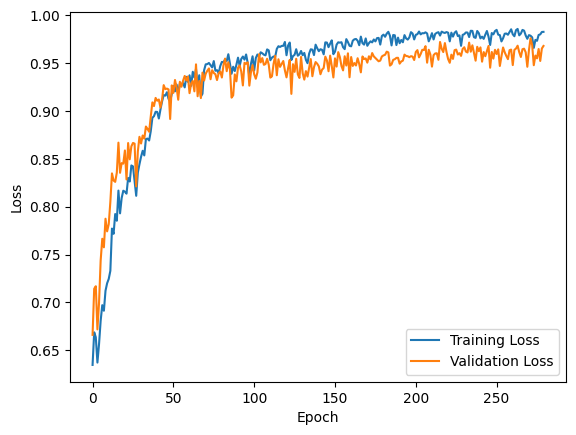

In [70]:
import deepchem as dc
import pandas as pd
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# Обучение модели с отслеживанием истории
losses = []
val_losses = []

for epoch in range(280):  # 100 эпох обучения
    model.fit(train_dataset, nb_epoch=1)  # Обучение модели на одной эпохе

    # Оценка на обучающей и валидационной выборках
    train_scores = model.evaluate(train_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])
    val_scores = model.evaluate(test_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])

    # Запись потерь
    losses.append(train_scores['roc_auc_score'])
    val_losses.append(val_scores['roc_auc_score'])

# Построение графиков обучения
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

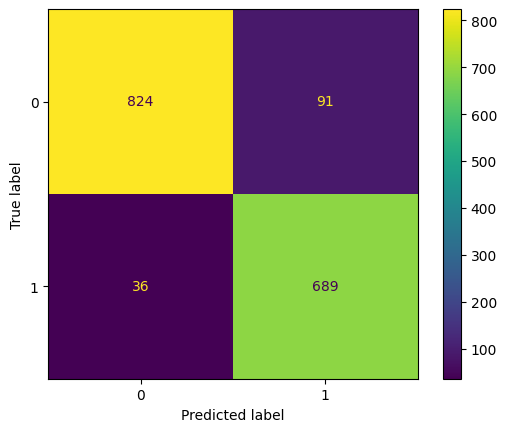

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
dataset_pred = dc.data.NumpyDataset(X=train_dataset.X)  
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,train_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
#classes = np.argmax(prediction, axis=2)

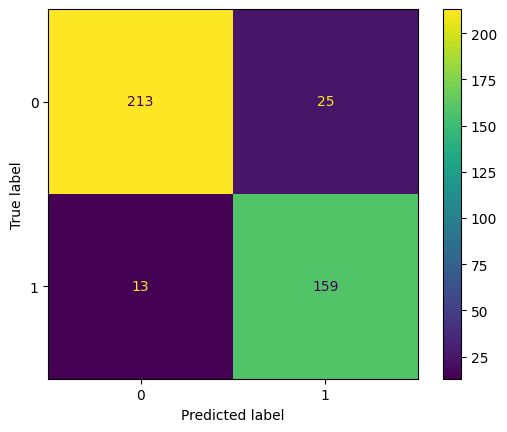

In [72]:
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)  
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,test_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [73]:
import matplotlib.pyplot as plt
#6. Оценка модели
# Определение метрики
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# Оценка на обучающей выборке
train_scores = model.evaluate(train_dataset, [metric], transformers=[])

# Оценка на тестовой выборке
test_scores = model.evaluate(test_dataset, [metric], transformers=[])

print(f'Train ROC AUC: {train_scores["roc_auc_score"]}')
print(f'Test ROC AUC: {test_scores["roc_auc_score"]}')

metric = dc.metrics.Metric(dc.metrics.recall_score)
test_scores = model.evaluate(test_dataset, [metric], transformers=[])
print(f'Test RECALL: {test_scores["recall_score"]}')

# metric = dc.metrics.Metric(dc.metrics.precision_score)
# test_scores = model.evaluate(test_dataset, [metric], transformers=[])
# print(f'Test PRECISION: {test_scores["precision_score"]}')

Train ROC AUC: 0.9827340488968397
Test ROC AUC: 0.9680165448249327
Test RECALL: 0.8641304347826086


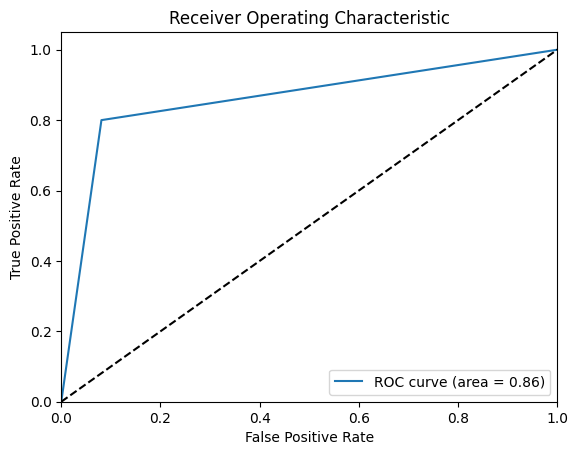

In [65]:
import deepchem as dc
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# ... (Ваш код для обучения модели)

# Оценка на тестовой выборке
y_true = test_dataset.y
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)  
y_pred = model.predict(dataset_pred) # Получаем вероятности для класса "1"
y_pred = np.argmax(y_pred, axis=2)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()